In [22]:
import os
import re
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
from gensim.models import Word2Vec
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator
from unidecode import unidecode
from langdetect import detect
import matplotlib.pyplot as plt

#### Preprocess the text by removing accents, special characters, and converting to lowercase.

In [2]:
stop_words = stopwords.words('german')
print(stop_words)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def preprocessing_text(text):
    
    word_without_accents = unidecode(text)
    words = word_tokenize(word_without_accents.lower())
    tokens = [word for word in words if word not in string.punctuation]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

### Task 1
##### Count the occurrences of the word "gastarbeiter" in each text file in the specified directory.

In [5]:
def count_gastarbeiter_in_files(directory):
    
    document_counts = {}
    all_preprocessed_contents = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), "r", encoding="utf-8") as file:
                content = file.read()
            
            preprocessed_content = preprocessing_text(content)
            all_preprocessed_contents.extend(preprocessed_content) 
            count = preprocessed_content.count("gastarbeiter")
            document_counts[filename] = count
    
    return document_counts, all_preprocessed_contents

In [6]:
directory = "/Users/azizbek.ussenov/Desktop/CEU/ML for NLP/ML-for-NLP-main/LTWprotocols_ordered"

counts, all_preprocessed_contents = count_gastarbeiter_in_files(directory)

total_count = 0

for file in sorted(counts.keys(), key=lambda x: int(re.search(r'\d+', x).group())):
    count = counts[file]
    print(f"{file}: {count}")
    total_count += count

print(f"\nTotal count of 'gastarbeiter': {total_count}")

LTProtocols  (001).txt: 0
LTProtocols  (002).txt: 0
LTProtocols  (003).txt: 0
LTProtocols  (004).txt: 0
LTProtocols  (005).txt: 0
LTProtocols  (006).txt: 0
LTProtocols  (007).txt: 0
LTProtocols  (008).txt: 0
LTProtocols  (009).txt: 0
LTProtocols  (010).txt: 0
LTProtocols  (011).txt: 0
LTProtocols  (012).txt: 0
LTProtocols  (013).txt: 0
LTProtocols  (014).txt: 0
LTProtocols  (015).txt: 0
LTProtocols  (016).txt: 0
LTProtocols  (017).txt: 0
LTProtocols  (018).txt: 0
LTProtocols  (019).txt: 0
LTProtocols  (020).txt: 0
LTProtocols  (021).txt: 0
LTProtocols  (022).txt: 0
LTProtocols  (023).txt: 0
LTProtocols  (024).txt: 0
LTProtocols  (025).txt: 0
LTProtocols  (026).txt: 0
LTProtocols  (027).txt: 0
LTProtocols  (028).txt: 0
LTProtocols  (029).txt: 0
LTProtocols  (030).txt: 0
LTProtocols  (031).txt: 0
LTProtocols  (032).txt: 0
LTProtocols  (033).txt: 0
LTProtocols  (034).txt: 0
LTProtocols  (035).txt: 0
LTProtocols  (036).txt: 0
LTProtocols  (037).txt: 0
LTProtocols  (038).txt: 0
LTProtocols 

#### The total number of `gastarbeiter` is 102 based on my preprocessing methodology. The individual txt files show different occurences of that word.

### Task 2
##### Identify words that frequently co-occur with "gastarbeiter" and analyze their relationships. Use techniques such as word co-occurrence matrices and association measures. Suggest other alternatives.

#### Co-occurence analysis

##### I attempted to utilize CountVectorizer, but it continuously caused the kernel to stop. It appears that the memory usage is excessively high. Consequently, I decided to manually generate co-occurrence instead with the help of ChatGPT.

In [7]:
def cooccurrence_matrix(files, window_size=2):
    
    vocab = Counter()
    cooccurrence = defaultdict(Counter)
    
    for file in files:
        tokens = preprocessing_text(file)
        vocab.update(tokens)
        
        for i, token in enumerate(tokens):
            if token == 'gastarbeiter':
                start = max(0, i - window_size)
                end = min(len(tokens), i + window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                for word in context:
                    cooccurrence[token][word] += 1
    
    return vocab, cooccurrence

#### Association Measure: PMI

In [8]:
def calculate_pmi(cooccurrence, vocab, total_count, positive=True):
    
    pmi = defaultdict(Counter)
    for word, context in cooccurrence.items():
        for context_word, count in context.items():
            p_word = vocab[word] / total_count
            p_context_word = vocab[context_word] / total_count
            p_word_context = count / total_count
            value = np.log2(p_word_context / (p_word * p_context_word))
            if positive:
                value = max(0, value)
            pmi[word][context_word] = value
    
    return pmi

In [9]:
files = []
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read()
            files.append(content)

vocab, cooccurrence = cooccurrence_matrix(files, window_size=2)
total_counts = sum(vocab.values())

In [10]:
pmi = calculate_pmi(cooccurrence, vocab, total_counts)

pmi_df = pd.DataFrame(pmi).fillna(0)
pmi_df

gastarbeiter
sehen                  5.057854
viele                  5.303994
be                     2.344999
notigen                8.156024
heuer                  6.157075
...                         ...
ehemaliger            11.400282
kellner               11.907765
turkische             14.995228
gastarbeiterinnen     17.580191
gegeben                3.611434

[321 rows x 1 columns]

In [11]:
top_10_cooccurrences = pmi['gastarbeiter'].most_common(10)
print("\nTop PMI based co-occurring words with 'gastarbeiter':\n")
for word, score in top_10_cooccurrences:
    print(f"{word}: {score}")


Top PMI based co-occurring words with 'gastarbeiter':

au'sweichroute: 17.58019072102733
fernlastfahrer: 17.58019072102733
umidl: 17.58019072102733
fersnifahrier: 17.58019072102733
nachtubeirwachung: 17.58019072102733
grenzlandbereicb: 17.58019072102733
hereingeholte: 17.58019072102733
rekeln: 17.58019072102733
gastarbeiterinnen: 17.58019072102733
skrupellosen: 16.58019072102733


#### Alternative: Word embeddings - Word2Vec

In [14]:
sentences = [preprocessing_text(file) for file in files]

model_vec = Word2Vec(sentences, vector_size=100, window=2, min_count=1, workers=8)

top_10_similar_words = model_vec.wv.most_similar('gastarbeiter', topn=10)
print("\nWords most similar to 'gastarbeiter' based on Word2Vec approach:\n")
for word, score in top_10_similar_words:
    print(f"{word}: {score}")


Words most similar to 'gastarbeiter' based on Word2Vec approach:

ermittlung: 0.9403722286224365
pkws: 0.9386870265007019
kostenaufwand: 0.9379227757453918
heizungen: 0.9365369081497192
mu: 0.9363107681274414
versicherte: 0.9362139105796814
15-: 0.9355510473251343
kunststoffe: 0.935512363910675
einkunfte: 0.9348942637443542
wartung: 0.9329049587249756


* PMI Results: The top co-occurring words with "gastarbeiter" are more likely to be related to specific contexts or events where "gastarbeiter" is used. Words like "fernlastfahrer" (long-distance driver) and "nachtubeirwachung" (night surveillance) suggest specific situational contexts. 
# 
* Word2Vec Results: The similar words are semantically related to "gastarbeiter" and cover a broader range of topics. Words like "ermittlung" (investigation) and "kostenaufwand" (cost expenditure) indicate broader conceptual similarities rather than specific co-occurrences.

### Task 3

#### Examine the frequency of "gastarbeiter" over time. Contrast it with another word of your own choosing. (Use language detector or google translate to implement your idea.)

In [15]:
def extract_year_from_lines(lines):
    german_months = (
        "Januar", "Februar", "März", "April", "Mai", "Juni",
        "Juli", "August", "September", "Oktober", "November", "Dezember"
    )
    month_pattern = fr'({"|".join(german_months)})'
    year_pattern = r'\b\d{4}\b'
    for line in lines:
        month_match = re.search(month_pattern, line)
        if month_match:
            month_end_index = month_match.end()
            year_match = re.search(year_pattern, line[month_end_index:])
            if year_match:
                return int(year_match.group())
    return None

In [16]:
file_years = {}
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.readlines()
            year = extract_year_from_lines(content)
            if year is not None:
                file_years[filename] = year
file_years

{'LTProtocols  (001).txt': 1961,
 'LTProtocols  (002).txt': 1961,
 'LTProtocols  (003).txt': 1961,
 'LTProtocols  (004).txt': 1957,
 'LTProtocols  (005).txt': 1961,
 'LTProtocols  (006).txt': 1961,
 'LTProtocols  (007).txt': 1954,
 'LTProtocols  (008).txt': 1961,
 'LTProtocols  (009).txt': 1961,
 'LTProtocols  (010).txt': 1961,
 'LTProtocols  (011).txt': 1960,
 'LTProtocols  (012).txt': 1962,
 'LTProtocols  (013).txt': 1957,
 'LTProtocols  (014).txt': 1962,
 'LTProtocols  (015).txt': 1962,
 'LTProtocols  (016).txt': 1962,
 'LTProtocols  (017).txt': 1962,
 'LTProtocols  (018).txt': 1962,
 'LTProtocols  (019).txt': 1962,
 'LTProtocols  (020).txt': 1960,
 'LTProtocols  (021).txt': 1962,
 'LTProtocols  (022).txt': 1962,
 'LTProtocols  (023).txt': 1962,
 'LTProtocols  (024).txt': 1962,
 'LTProtocols  (025).txt': 1962,
 'LTProtocols  (026).txt': 1962,
 'LTProtocols  (027).txt': 1962,
 'LTProtocols  (028).txt': 1963,
 'LTProtocols  (029).txt': 1963,
 'LTProtocols  (030).txt': 1963,
 'LTProtoc

In [17]:
yearly_counts = defaultdict(int)
for filename, count in counts.items():
    if filename in file_years:
        year = file_years[filename]
        yearly_counts[year] += count

sorted_yearly_counts = sorted(yearly_counts.items())
sorted_yearly_counts

[(1078, 0),
 (1079, 0),
 (1334, 0),
 (1848, 0),
 (1897, 0),
 (1919, 0),
 (1938, 0),
 (1949, 0),
 (1953, 0),
 (1954, 0),
 (1957, 0),
 (1959, 0),
 (1960, 0),
 (1961, 0),
 (1962, 0),
 (1963, 0),
 (1964, 0),
 (1965, 0),
 (1966, 0),
 (1967, 1),
 (1968, 1),
 (1969, 0),
 (1970, 0),
 (1971, 0),
 (1972, 3),
 (1973, 25),
 (1974, 6),
 (1975, 12),
 (1976, 5),
 (1977, 3),
 (1978, 6),
 (1979, 2),
 (1980, 3),
 (1981, 4),
 (1982, 2),
 (1983, 0),
 (1984, 1),
 (1985, 2),
 (1986, 1),
 (1987, 2),
 (1988, 0),
 (1989, 2),
 (1990, 4),
 (1991, 4),
 (1992, 6),
 (1993, 0),
 (1994, 0),
 (1995, 0),
 (1996, 1),
 (1997, 1),
 (1998, 2),
 (1999, 2),
 (2000, 0),
 (2001, 0),
 (2002, 0),
 (2003, 0),
 (2004, 0),
 (2005, 0),
 (2006, 0),
 (2007, 0),
 (2008, 0),
 (2009, 1),
 (2010, 0),
 (2121, 0),
 (2140, 0),
 (2855, 0),
 (5388, 0)]

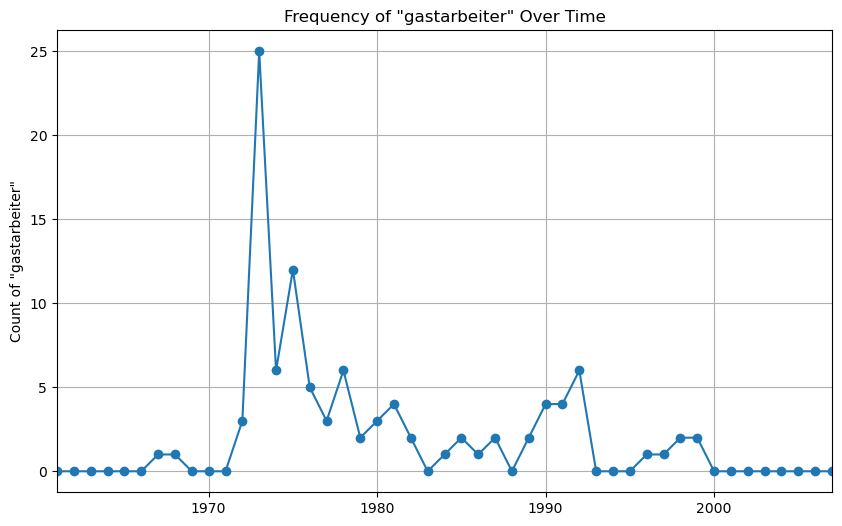

In [18]:
df = pd.DataFrame(sorted_yearly_counts, columns=['Year', 'Count'])

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Count'], marker='o')
plt.xlabel('')
plt.ylabel('Count of "gastarbeiter"')
plt.title('Frequency of "gastarbeiter" Over Time')
plt.grid(True)
plt.xlim(1961, 2007)
plt.show()

* There is a noticeable peak in the usage of the term around the early 1970s, reaching its highest point.
* After this peak, there are fluctuations, but the overall trend shows a decline in usage towards the 1980s and onwards.
* The term sees occasional increases in certain years but does not reach the high frequency observed in the early 1970s again.

##### New word = 'landtag'

In [19]:
def count_landtag_in_files(directory):
    
    document_counts = {}
    all_preprocessed_contents = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), "r", encoding="utf-8") as file:
                content = file.read()
            
            preprocessed_content = preprocessing_text(content)
            all_preprocessed_contents.extend(preprocessed_content) 
            count = preprocessed_content.count("landtag")
            document_counts[filename] = count
    
    return document_counts, all_preprocessed_contents

In [23]:
translator = GoogleTranslator(source='auto', target='en')

In [24]:
new_word = 'landtag'
lang = detect(new_word)
if lang != 'en':
    text = translator.translate(new_word, src=lang, dest='en')
    print(text)
else:
    print(new_word)

Parliament


In [25]:
landtag, all_preprocessed_contents = count_landtag_in_files(directory)

In [26]:
new_yearly_counts = defaultdict(int)
for filename, count in landtag.items():
    if filename in file_years:
        year = file_years[filename]
        new_yearly_counts[year] += count

landtag_yearly_counts = sorted(new_yearly_counts.items())
landtag_yearly_counts

[(1078, 1),
 (1079, 7),
 (1334, 16),
 (1848, 6),
 (1897, 8),
 (1919, 29),
 (1938, 20),
 (1949, 26),
 (1953, 44),
 (1954, 3),
 (1957, 71),
 (1959, 23),
 (1960, 48),
 (1961, 257),
 (1962, 374),
 (1963, 397),
 (1964, 345),
 (1965, 226),
 (1966, 314),
 (1967, 321),
 (1968, 407),
 (1969, 422),
 (1970, 303),
 (1971, 163),
 (1972, 282),
 (1973, 245),
 (1974, 357),
 (1975, 170),
 (1976, 344),
 (1977, 232),
 (1978, 239),
 (1979, 178),
 (1980, 233),
 (1981, 272),
 (1982, 203),
 (1983, 322),
 (1984, 277),
 (1985, 259),
 (1986, 307),
 (1987, 346),
 (1988, 496),
 (1989, 503),
 (1990, 670),
 (1991, 602),
 (1992, 586),
 (1993, 490),
 (1994, 708),
 (1995, 502),
 (1996, 1009),
 (1997, 1396),
 (1998, 1312),
 (1999, 1276),
 (2000, 990),
 (2001, 1191),
 (2002, 987),
 (2003, 1190),
 (2004, 1136),
 (2005, 843),
 (2006, 986),
 (2007, 1260),
 (2008, 1398),
 (2009, 1283),
 (2010, 842),
 (2121, 25),
 (2140, 45),
 (2855, 14),
 (5388, 54)]

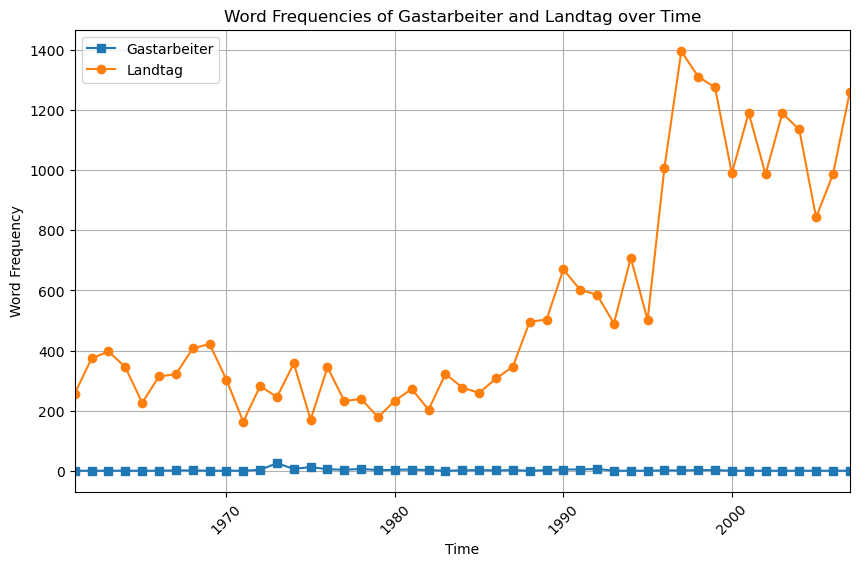

In [27]:
gastarbeiter_timestamps, gastarbeiter_counts = zip(*sorted_yearly_counts)
landtag_timestamps, landtag_counts = zip(*landtag_yearly_counts)

plt.figure(figsize=(10, 6))
plt.plot(gastarbeiter_timestamps, gastarbeiter_counts, label='Gastarbeiter', marker='s')
plt.plot(landtag_timestamps, landtag_counts, label='Landtag', marker='o')

plt.xlabel('Time')
plt.ylabel('Word Frequency')
plt.title('Word Frequencies of Gastarbeiter and Landtag over Time')
plt.grid(True)
plt.xlim(1961, 2007)
plt.legend()

plt.xticks(rotation=45)  
plt.show()

* The word "Landtag" shows a consistent and generally increasing trend in usage over the years, especially noticeable from the 1980s onwards.
* In contrast, "gastarbeiter" remains relatively low in frequency throughout the period, with minor fluctuations.
* The comparison highlights that while "gastarbeiter" had specific periods of higher usage, "Landtag" was consistently more prevalent and saw a significant rise over time.

### Task 4
#### Extract the paragraph surrounding the word "gastarbeiter" (i.e three sentences (or lines) above and three below) and perform sentiment analysis of the paragraph. 

#### Focus on txt file #100 as an example

In [28]:
def extract_paragraph(text, keyword):
    
    sentences = re.split('(?<=[.!?]) +', text)
    keyword_index = next(i for i, sentence in enumerate(sentences) if keyword in sentence)
    start = max(0, keyword_index - 3)
    end = min(len(sentences), keyword_index + 4)
    
    return sentences[start:end]

In [29]:
with open('/Users/azizbek.ussenov/Desktop/CEU/ML for NLP/ML-for-NLP-main/LTWprotocols_ordered/LTProtocols  (100).txt', 'r', encoding='utf-8') as file:
    content = file.read()
    
paragraph = extract_paragraph(content, "Gastarbeiter")
paragraph_text = ' '.join(paragraph)
print("\n".join(paragraph))

Es  sind  dies  2.500  bis  3.000  Mann, 
welche  zwar  hier  abgebaut,  aber  in  unserer  Ar 
beitslosenstatistik  nicht  registriert  werden,  weil 
sie  ja  nach  Jugoslawien  zurückkehren.
Die  wirt 
schaftlichen  Folgen  dieses  Stillstandes  in  der 
in  unserem 
Bauwirtschaft  bleiben  allerdings 
Lande.
Als  wir  uns  gegen  die  uneingeschränkte 
Hereinnahme  ausländischer  Arbeitskräfte  zur 
Wehr  setzten,  sagte  man  uns,  daß  unser  Stand 
punkt  falsch  sei,  weil  sich  durch  erhöhte  Lei 
stungen  im  Sommer  mehr  Winterbeschäftigungs-
möglichkeit  ergäbe.
Wir  meinten,  verteilt  die  zur 
Verfügung  stehenden  Aufträge  besser  auf  das 
ganze  Jahr,  schafft  erträgliche  Arbeitsbedingun 
gen  für  die  Bauarbeiter,  ich  habe  ja  darüber  im 
vergangenen  Jahr  gesprochen  —  dann  werden 
wir  sehen,  wie  viele  Gastarbeiter  wir  noch  be 
nötigen.


Es  ist  so  gekommen,  wie  wir  vorausgesagt 
und  befürchtet  haben.
Obwohl  in  der  Steier 
mark  berei

In [30]:
def translate_text(text, target_language='en'):
    translated = translator.translate(text, dest=target_language)
    return translated

def get_textblob_sentiment(text): 
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(paragraph_text)

In [31]:
translated_text = translate_text(paragraph_text)
translated_sentences = re.split(r'(?<=[.!?]) +', translated_text)

for sentence in translated_sentences:
    print(sentence)

These are 2,500 to 3,000 men who are laid off here but are not recorded in our unemployment statistics because they return to Yugoslavia.
The economic consequences of this standstill in our construction industry remain, however.
When we opposed the unrestricted importation of foreign workers, we were told that our position was wrong because increased output in the summer would create more winter employment opportunities.
We thought that the available orders should be distributed better over the whole year, that we should create tolerable working conditions for the construction workers - I spoke about this last year - then we will see how many guest workers we still need.
It has happened just as we predicted and feared.
Although ten percent of those employed in the construction industry in Styria are already foreigners - and as you will know, this is problematic for an economic sector - the absolute number of employees has not increased in either summer or winter.
We have had to use gue

In [32]:
textblob_sentiment = get_textblob_sentiment(translated_text)
vader_sentiment = get_vader_sentiment(paragraph_text)

print("TextBlob Sentiment:", textblob_sentiment)
print("VADER Sentiment:", vader_sentiment)

TextBlob Sentiment: 0.12656250000000002
VADER Sentiment: {'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.9864}


#### Comparison
##### TextBlob:

* Slightly positive sentiment (polarity ~ 0.13).
##### VADER:

* Strongly negative sentiment (compound ~ -0.99).
* Majority of the text is perceived as neutral (85.7%).